<a href="https://colab.research.google.com/github/soeun823/hon_gong_machine/blob/master/chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**문제**<br>
: 농어길이를 가지고 농어 무게를 예측, 다른 농어 데이터로 학습

#K-최근접이웃회귀

: 지도 알고리즘


*   분류
*   회귀 : 임의 어떤 숫자(값)을 예측<br>
    => 이웃한 샘플의 타깃값으로 평균을 내어 예측



> 혼공머신 115pg에 개념~




In [1]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

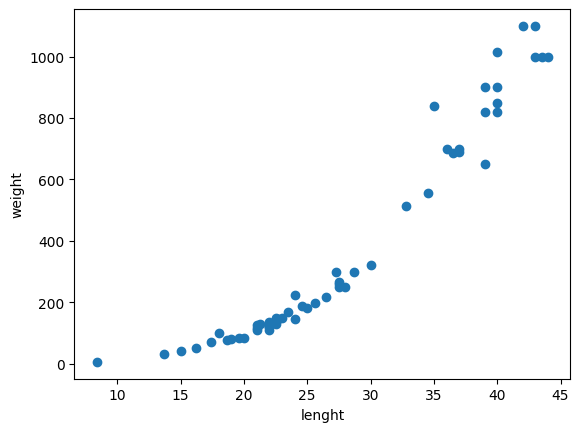

In [2]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel("lenght")
plt.ylabel("weight")
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [4]:
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [5]:
test_array = test_array.reshape(2,2)#배열 크기 지정
print(test_array.shape)

(2, 2)


In [6]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [7]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
#k-최근접 이웃 회귀 모델을 훈련 합니다.
knr.fit(train_input, train_target)
print(knr.score(test_input,test_target))

0.992809406101064


회귀에서는 예측하는 값이 모두 임의의 수이기 때문에 정확한 숫자를 맞힌다는 것은 불가능하다.<br>
회귀에서 평가하는 점수 :: **결정계수($R^2$)**<br>
$R^2 = 1 - \frac{(타깃 - 측)^2의 합}{(타깃 - 평균)^2의 합}$

In [8]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [10]:
print(knr.score(train_input, train_target))

0.9698823289099254


훈련세트 점수 > 테스트새트 점수 : **과대 접합**<br>
테스트세트 점수 > 훈련세트 점수 or 두점수 모두 낮을 때 : **과소 접합**

In [11]:
knr.n_neighbors = 3 #이웃의 갯수 = 3

knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


k 값을 줄였더니 훈련 세트의 $R^2$의 값이 높아짐

In [13]:
print(knr.score(test_input, test_target))# 성공적으로 잘 된거 같음!!!
#혼공 머신의 실력이 날로 늘어나는 군~

0.9746459963987609


**회귀문제 다루기**:문제 해결

#선형회귀

홈공머신이 앞서 만든 모델을 사용해 예측을 한 값과 <br>
저울로 잰 값이 너무 나도 차이가 남ㅠㅠ

In [1]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [6]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)
print(knr.predict([[50]]))

[1033.33333333]


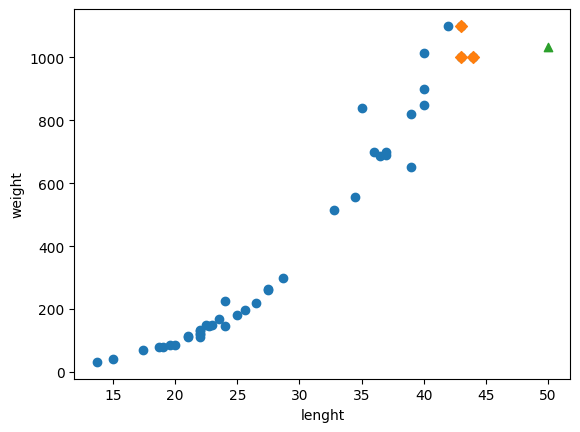

1033.3333333333333
[1033.33333333]


In [13]:
import matplotlib.pyplot as plt
distances, indexes = knr.kneighbors([[50]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes],train_target[indexes], marker="D")#이웃 샘플을 그림

plt.scatter(50,1033,marker="^")
plt.xlabel("lenght")
plt.ylabel("weight")
plt.show()

#산점도를 보면 그래프가 오른족 위로 올라가는 형태라, 길이가 커질수록 무게가 올라간다,
#하지만 50cm 농어가 훈련세트의 범위에서 벗어나 엉뚱한 값으로 예측한다.
print(np.mean(train_target[indexes])) #여전히 엉뚱한 값
print(knr.predict([[100]]))#=>길이가 100cm 여도 가장 가까운 녀석들의 평균 값을 출력하니 같은 값이 나올것임

결론 :<br>
k-최근접 이웃 말고 다른 알고리즘을 찾아보자!!!!
<br><br>
**선형 회귀**

In [ ]:
# from sklearn.linear_model